In [1]:
import os
import torch
import pandas as pd
import cv2 as cv
import numpy as np
from sklearn.metrics import cohen_kappa_score, f1_score, recall_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error
from model import trainedModel
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
join = os.path.join

rootDir = os.path.dirname(os.getcwd()) # project parent directory
dataDir = join(rootDir, "combinedData")

device = "cuda" if torch.cuda.is_available() else "mps"

############################# Performance metrics #############################
def classification_metrics(y_true, y_pred):
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    f1 = f1_score(y_true, y_pred, average='macro')
    spe = np.mean(specificity(y_true, y_pred))
    return dict(qwk=qwk, f1=f1, spe=spe)

def specificity(y_true: np.array, y_pred: np.array, classes: set = None):
    if classes is None:
        classes = set(np.concatenate((np.unique(y_true), np.unique(y_pred))))
    specs = []
    for cls in classes:
        y_true_cls = np.array((y_true == cls), np.int)
        y_pred_cls = np.array((y_pred == cls), np.int)
        specs.append(recall_score(y_true_cls, y_pred_cls, pos_label=0))
    return specs
################################################################################


## Train with a ResNet-18

#### Trained on MMAC + PALM + synthesised images, with mixup augmentation

/Users/fabianyii/miniconda3/envs/mlp/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fabianyii/miniconda3/envs/mlp/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Batches: 100%|████████████████████████████████| 127/127 [08:59<00:00,  4.24s/it]


1.2170961536760405


Batches: 100%|████████████████████████████████| 127/127 [09:20<00:00,  4.41s/it]


1.0145848510772224


Batches: 100%|████████████████████████████████| 127/127 [08:22<00:00,  3.96s/it]


1.0050379525958084


Batches: 100%|████████████████████████████████| 127/127 [08:17<00:00,  3.91s/it]


0.9580389115754075


Batches: 100%|████████████████████████████████| 127/127 [07:44<00:00,  3.66s/it]


0.9183060672339491


Batches: 100%|████████████████████████████████| 127/127 [07:50<00:00,  3.70s/it]


0.8896931175171859


Batches: 100%|████████████████████████████████| 127/127 [07:55<00:00,  3.74s/it]


0.9056889452333525


Batches: 100%|████████████████████████████████| 127/127 [07:51<00:00,  3.71s/it]


0.8292199866039547


Batches: 100%|████████████████████████████████| 127/127 [07:46<00:00,  3.67s/it]


0.8351984005274735


Batches: 100%|████████████████████████████████| 127/127 [07:43<00:00,  3.65s/it]


0.7764481428101306


Batches: 100%|████████████████████████████████| 127/127 [07:58<00:00,  3.77s/it]


0.8088777459512545


Batches: 100%|████████████████████████████████| 127/127 [08:36<00:00,  4.07s/it]


0.7651676254009637


Batches: 100%|████████████████████████████████| 127/127 [08:07<00:00,  3.84s/it]


0.7768492623576968


Batches: 100%|████████████████████████████████| 127/127 [08:17<00:00,  3.91s/it]


0.7678328025059438


Batches: 100%|████████████████████████████████| 127/127 [07:39<00:00,  3.62s/it]


0.771989272335383


Batches: 100%|████████████████████████████████| 127/127 [07:37<00:00,  3.61s/it]


0.7429922739351829


Batches: 100%|████████████████████████████████| 127/127 [07:34<00:00,  3.58s/it]


0.747263576336733


Batches: 100%|████████████████████████████████| 127/127 [07:36<00:00,  3.59s/it]


0.7239902120406233


Batches: 100%|████████████████████████████████| 127/127 [07:58<00:00,  3.76s/it]


0.7138223127117307


Batches: 100%|████████████████████████████████| 127/127 [08:59<00:00,  4.25s/it]


0.6855577990764709


Batches: 100%|████████████████████████████████| 127/127 [08:03<00:00,  3.80s/it]


0.7011484416920369


Batches: 100%|████████████████████████████████| 127/127 [07:45<00:00,  3.67s/it]


0.6833485803735537


Batches: 100%|████████████████████████████████| 127/127 [07:52<00:00,  3.72s/it]


0.6541880845554232


Batches: 100%|████████████████████████████████| 127/127 [07:40<00:00,  3.63s/it]


0.7077654855927145


Batches: 100%|████████████████████████████████| 127/127 [07:40<00:00,  3.62s/it]


0.6630360172020169


Batches: 100%|████████████████████████████████| 127/127 [07:32<00:00,  3.57s/it]


0.6341272423586507


Batches: 100%|████████████████████████████████| 127/127 [07:36<00:00,  3.59s/it]


0.688006117587953


Batches: 100%|████████████████████████████████| 127/127 [08:20<00:00,  3.94s/it]


0.684679558896643


Batches: 100%|████████████████████████████████| 127/127 [07:48<00:00,  3.69s/it]


0.6464758557597483


Batches: 100%|████████████████████████████████| 127/127 [07:40<00:00,  3.63s/it]


0.6341910310617582


Batches: 100%|████████████████████████████████| 127/127 [07:32<00:00,  3.56s/it]


0.6471413270695003


Batches: 100%|████████████████████████████████| 127/127 [07:36<00:00,  3.60s/it]


0.6459300975630603


Batches: 100%|████████████████████████████████| 127/127 [07:46<00:00,  3.67s/it]


0.6365446164382724


Batches: 100%|████████████████████████████████| 127/127 [07:43<00:00,  3.65s/it]


0.6491747526671943


Batches: 100%|████████████████████████████████| 127/127 [07:38<00:00,  3.61s/it]


0.6452631689901427


Batches: 100%|████████████████████████████████| 127/127 [08:06<00:00,  3.83s/it]


0.6194294517434488


Batches: 100%|████████████████████████████████| 127/127 [08:01<00:00,  3.79s/it]


0.6369401115601457


Batches: 100%|████████████████████████████████| 127/127 [07:37<00:00,  3.60s/it]


0.6598877665095442


Batches: 100%|████████████████████████████████| 127/127 [07:39<00:00,  3.62s/it]


0.5881337162077896


Batches: 100%|████████████████████████████████| 127/127 [07:40<00:00,  3.62s/it]


0.6438729680898622


Batches: 100%|████████████████████████████████| 127/127 [07:35<00:00,  3.59s/it]


0.6146381652261329


Batches: 100%|████████████████████████████████| 127/127 [07:35<00:00,  3.59s/it]


0.6235373475420194


Batches: 100%|████████████████████████████████| 127/127 [07:52<00:00,  3.72s/it]


0.6300950740266034


Batches: 100%|████████████████████████████████| 127/127 [07:42<00:00,  3.64s/it]


0.5913348488920317


Batches: 100%|████████████████████████████████| 127/127 [07:38<00:00,  3.61s/it]


0.6149316446518335


Batches: 100%|████████████████████████████████| 127/127 [07:40<00:00,  3.62s/it]


0.6353986922680862


Batches: 100%|████████████████████████████████| 127/127 [07:41<00:00,  3.63s/it]


0.6447451539396301


Batches: 100%|████████████████████████████████| 127/127 [07:45<00:00,  3.66s/it]


0.5981655158395842


Batches: 100%|████████████████████████████████| 127/127 [07:42<00:00,  3.64s/it]


0.6675049033690625


Batches: 100%|████████████████████████████████| 127/127 [07:45<00:00,  3.67s/it]


0.6194698176984712


Epochs: 100%|████████████████████████████████| 50/50 [6:34:58<00:00, 473.97s/it]


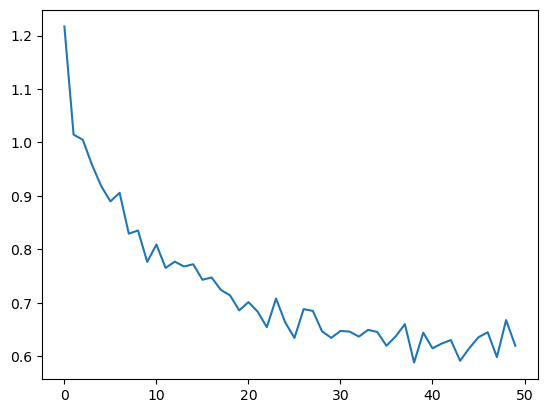

In [4]:
%run train

# Test (demonstration using train set)

#### Test-time augmentation implemented

In [3]:
testDf = pd.read_csv(join(dataDir, "Groundtruths", "combinedTrainingLabels.csv"))
imageNames = list(testDf.image)
GTs = list(testDf.myopic_maculopathy_grade)

model = trainedModel(checkpoint = "bestModel.pth")
model.load(dir_path = join(rootDir, "weights"))

preds = []
for name in tqdm(imageNames):
    image = cv.imread(join(dataDir, "images", "training", name))
    preds.append(int(model.predict(image)))

In [26]:
classification_metrics(y_true = GTs[0:len(preds)], 
                       y_pred = preds)

{'qwk': 0.9768970120135537,
 'f1': 0.9803550509146616,
 'spe': 0.9855072463768118}